### **Dataset 1**

In [41]:
# import require libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

# read General1 dataset
df = pd.read_csv('/content/drive/MyDrive/Time_Series-Hassan/General/Data1.csv', parse_dates=True)
df.head()

,DATE,YEAR,EURO
0,01/01/2019,2019,8350
1,01/01/2019,2019,104
2,03/01/2019,2019,3666
3,03/01/2019,2019,1242
4,06/01/2019,2019,284


In [3]:
df.tail()

,DATE,YEAR,EURO
2846,18/11/2021,2021,29
2847,22/11/2021,2021,600
2848,23/11/2021,2021,3735
2849,24/11/2021,2021,15
2850,29/11/2021,2021,10


In [6]:
df.dtypes

DATE    object
YEAR     int64
EURO     int64
dtype: object

In [7]:
# converting date column to pandas datetime column  
df['DATE'] = pd.to_datetime(df['DATE'])
df.dtypes

DATE    datetime64[ns]
YEAR             int64
EURO             int64
dtype: object

In [15]:
df.set_index('DATE', inplace=True)
df.head()

,YEAR,EURO
DATE,,
2019-01-01,2019,8350
2019-01-01,2019,104
2019-03-01,2019,3666
2019-03-01,2019,1242
2019-06-01,2019,284


## **Visualization**

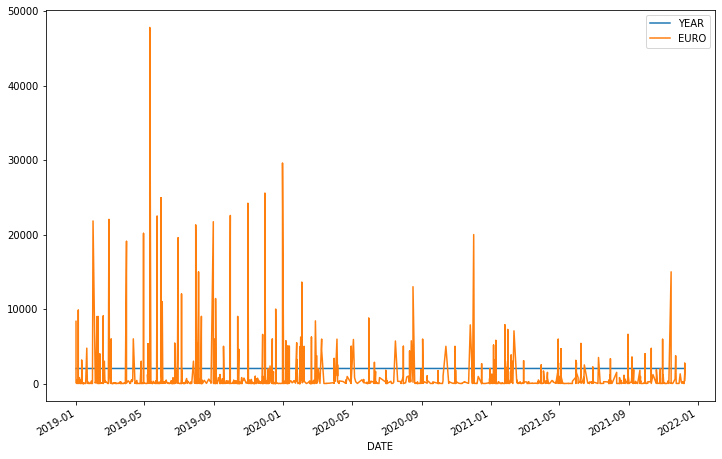

In [22]:
df.plot(figsize=(12,8))

Data looks seasonal

In [25]:
# testing for stationarity

from statsmodels.tsa.stattools import adfuller

test_result = adfuller(df['EURO'])

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(column):
    result=adfuller(column)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(df['EURO'])

ADF Test Statistic : -51.74916015489026
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 2850
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [31]:
# for monthly data
df['DATE'] = pd.to_datetime(df['DATE'])
df_month = df.groupby(pd.Grouper(key='DATE', freq='1M')).sum() # groupby each 1 month
df_month.drop(['YEAR'], axis=1, inplace=True)
df_month.head()

,EURO
DATE,
2019-01-31,60654
2019-02-28,64397
2019-03-31,33131
2019-04-30,34339
2019-05-31,107863


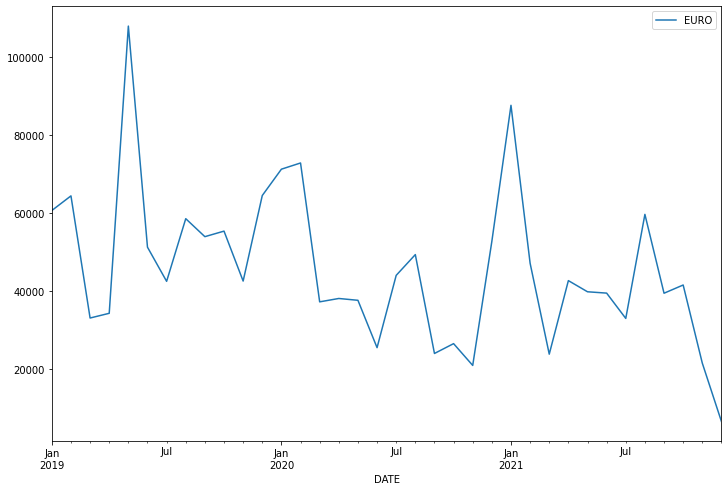

In [29]:
df_month.plot(figsize=(12,8))

In [30]:
adfuller_test(df_month['EURO'])

ADF Test Statistic : -4.1909576941284525
p-value : 0.0006825113194225437
#Lags Used : 0
Number of Observations Used : 35
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [33]:
df_month['Seasonal_First_Difference']=df_month['EURO']-df_month['EURO'].shift(12)
df_month.tail(10)

,EURO,Seasonal_First_Difference
DATE,,
2021-03-31,23877,-13393.0
2021-04-30,42705,4572.0
2021-05-31,39849,2183.0
2021-06-30,39506,13965.0
2021-07-31,33027,-11023.0
2021-08-31,59663,10299.0
2021-09-30,39478,15424.0
2021-10-31,41582,15009.0
2021-11-30,21586,593.0


In [35]:
adfuller_test(df_month['Seasonal_First_Difference'].dropna())

ADF Test Statistic : -1.8427010979010592
p-value : 0.3594771789872896
#Lags Used : 9
Number of Observations Used : 14
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


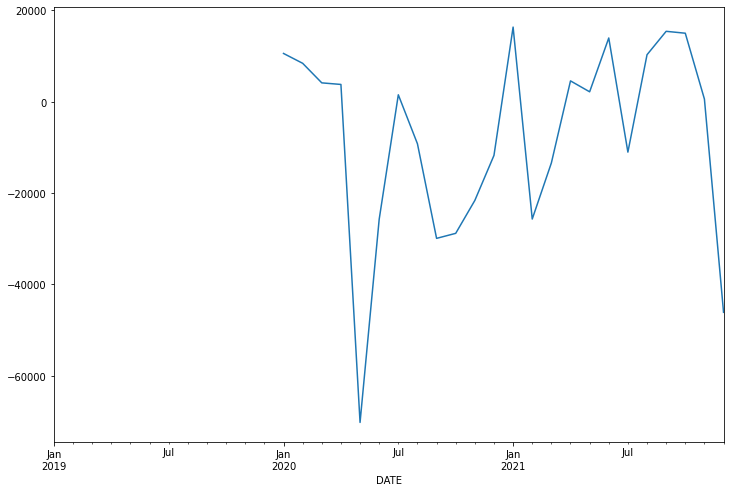

In [36]:
df_month['Seasonal_First_Difference'].plot(figsize=(12,8))

Auto Regressive Model

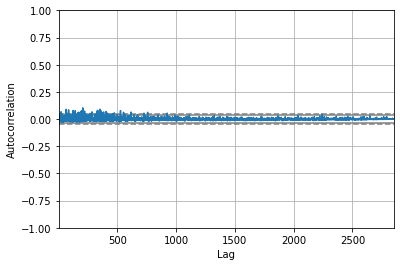

In [42]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['EURO'])
plt.show()

Model

In [43]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [45]:
model=ARIMA(df['EURO'],order=(1,1,1))
model_fit=model.fit()

In [46]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.EURO   No. Observations:                 2850
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -25922.032
Method:                       css-mle   S.D. of innovations           2154.904
Date:                Sat, 08 Jan 2022   AIC                          51852.063
Time:                        19:42:53   BIC                          51875.883
Sample:                             1   HQIC                         51860.654
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1470      0.084     -1.743      0.081      -0.312       0.018
ar.L1.D.EURO     0.0297      0.019      1.580      0.114      -0.007       0.067
ma.L1.D.EURO    -0.9985      0.002   -544.764      0.000      -1.002      -0.995
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           33.6281           +0.0000j           33.6281            0.0000
MA.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

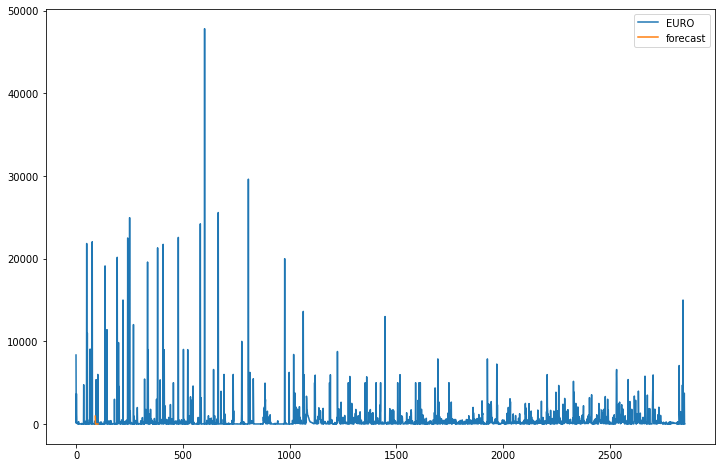

In [48]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['EURO','forecast']].plot(figsize=(12,8))


In [ ]:
df_month['EURO_LastYear_MONTH']=df_month['EURO'].shift(+12)
df_month

,EURO,EURO_LastYear_MONTH
DATE,,
2019-01-31,60654,NaN
2019-02-28,64397,NaN
2019-03-31,33131,NaN
2019-04-30,34339,NaN
2019-05-31,107863,NaN
2019-06-30,51264,NaN
2019-07-31,42522,NaN
2019-08-31,58560,NaN
2019-09-30,53956,NaN


In [ ]:
df_month = df_month.dropna()

In [ ]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=2, random_state=1)

In [ ]:
x1,x2,y=df_month['EURO'],df_month['EURO_LastYear_MONTH'],df_month['EURO']
x1,x2,y=np.array(x1),np.array(x2),np.array(y)
x1,x2,y=x1.reshape(-1,1),x2.reshape(-1,1),y.reshape(-1,1)  
final_x=np.concatenate((x1,x2),axis=1)
print(final_x)

[[ 71232.  60654.]
 [ 72820.  64397.]
 [ 37270.  33131.]
 [ 38133.  34339.]
 [ 37666. 107863.]
 [ 25541.  51264.]
 [ 44050.  42522.]
 [ 49364.  58560.]
 [ 24054.  53956.]
 [ 26573.  55375.]
 [ 20993.  42591.]
 [ 52749.  64486.]
 [ 87582.  71232.]
 [ 47151.  72820.]
 [ 23877.  37270.]
 [ 42705.  38133.]
 [ 39849.  37666.]
 [ 39506.  25541.]
 [ 33027.  44050.]
 [ 59663.  49364.]
 [ 39478.  24054.]
 [ 41582.  26573.]
 [ 21586.  20993.]
 [  6657.  52749.]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_x,y,test_size=0.2)

In [ ]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


LinearRegression()

In [ ]:
test1

array([[71232.],
       [60654.]])

In [ ]:
test1 = 60654
test2 = 71232
test1,test2 = np.array(test1),np.array(test2)
test1,test2=test1.reshape(-1,1),test2.reshape(-1,1)
final_test=np.concatenate((test1,test2),axis=1)

model.predict(final_test)

array([61608.71])

In [ ]:
# future values of 
for i in


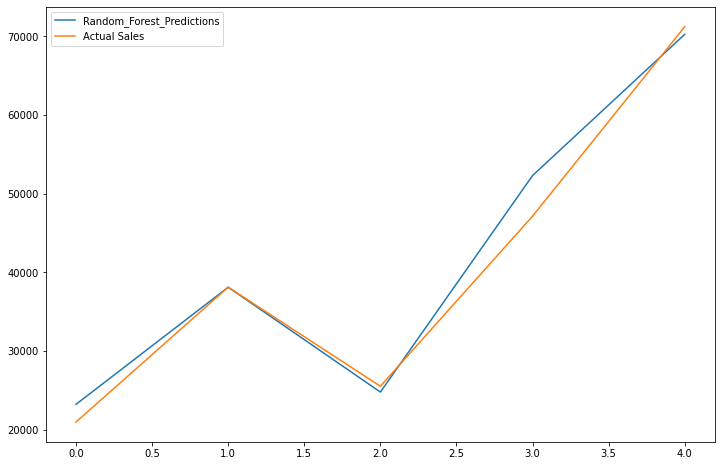

In [ ]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

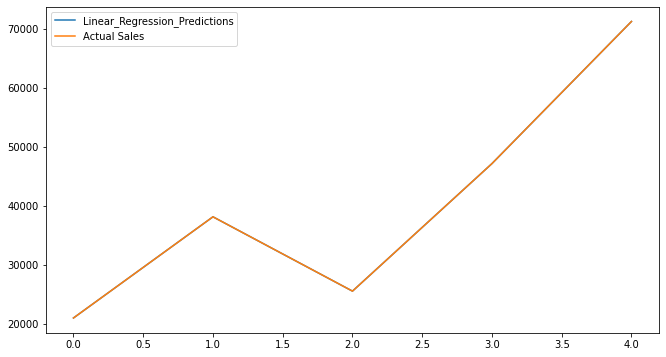

In [ ]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [ ]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 2576.425373927994
Mean Squared Error for Linear Regression Model is: 3.9852061127397324e-12


In [ ]:
# function to create and save machine learning models
# for each month 

def 